In [1]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from __code.svmbir_reconstruction import SvmbirReconstruction

from __code import system

system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

# Input sample folder

This folder will contains all the runs (1 run per angle).

<font color='blue'><b>Instructions</b>: select folder containing projections</font>

In [2]:
o_beam = SvmbirReconstruction(system=system)
o_beam.select_top_sample_folder()

Top sample folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September20_2024_PurpleCar_GoldenRatio_CT_5_0_C_Cd_inBeam_Resonance


# Input Open Beam (OB) folder

Just like for the sample, this folder contains 1 or more runs of the open beam images

<font color='blue'><b>Instructions</b>: select folder containing OB</font>

In [3]:
o_beam.select_top_ob_folder()

Top ob folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September26_2024_PurpleCar_OpenBean_5_0_C_Cd_inBeam_Resonance


# Pre-processing the data

This step will filter the data using the following criteria

* all the runs that do not have any tif images in it will be **rejected**
* the proton charge of each run will be retrieved and display in a recap graph. It will be up to the users to **select the proton charge** to use as well as the **acceptance criteria**. This is because the proton charge of each run is always slightly different, this criteria define the range for which 2 runs are considered being acquired with the same proton charge.

<img src="__code/__all/TutorialProtonChargeSelection.gif" />

<font color='blue'><b>Instructions</b>

 - Use the sliders to define the **sample proton charge** and **OB proton charge** to use
 - Use the second slider to define the size of the **acceptance criteria range**

<font size=1 color='black'><u>Developer Notes</u>: data are stored in <i>list_of_runs = {DataType.sample: {'Run_1234':
 {Run.full_path: "", Run.proton_charge: "", Run.use_it: "", Run.angle: "", ...}, ...}</i></font>
 

In [4]:
o_beam.checking_data()

interactive(children=(FloatSlider(value=5.0, description='sample pc', max=6.39261979793, min=-0.95576512851), …

This will recap the list of runs that will be used for SAMPLE and OB. 

<font color='blue'><b>Instructions</b>: Because some runs look like they are ok but still need to be rejected, **Feel free to manually select any run you want to exclude !**</font>

Mode of operation:
* CMD + click: select more than 1 run
* SHIFT + click: select all the runs up to previous click
</font>

<font size=1><u>Developer Notes</u>: this step will set the <i>Run.use_it</i> parametere of the <i>list_of_runs</i> dictionary. 

In [5]:
o_beam.recap_data()

# TOF mode 

You have the option between:

- <font color='blue'>white beam</font>: where all the images of a given projection will be added, removing the TOF information
- <font color='blue'>TOF</font>: you will need to select the range of TOF you want to combine

In [6]:
o_beam.mode_selection()

ToggleButtons(index=1, options=('white_beam', 'tof'), value='tof')

# Load data

This cell will load the data then will behave differently according to the mode you selected.

- <font color=blue><b>White beam</b></font>:
This step will add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information.

- <font color=blue><b>TOF</b></font>: you will need to define the range of TOF to use as well as the instrument settings to use. This will be done in the next 3 cells.

This step will also sort the runs by increasing angle value.

<font size=1><u>Developer Notes</u>: change the value of <i>Run.use_it</i> for runs rejected and combine runs data in <i>master_3d_data_array = {DataType.sample: [runs, y, x], ...}</font>


In [7]:
o_beam.load_data()

100%|██████████| 1/1 [00:07<00:00,  7.98s/it]


<font color=black>IMPORTANT: If running in <b>white beam</b> mode, this cell will be ignored</font>
<br>
<font color=blue>In TOF mode, this cell allows you to select the ranges of TOF you want to combine</font>

In [8]:
o_beam.select_tof_ranges() 

<font color=black>IMPORTANT: If running in <b>white beam</b> mode, this cell will be ignored</font><br>
<font color=blue>In TOF mode, this next cell will <b>combine the images</b> corresponding to that range of TOF</font>

In [9]:
o_beam.combine_tof_mode_data()

# Pre-processing - remove outliers

Two algorithms are provided:

* using histogram (remove dead pixels, abnormal very high counts)
* using thresholding (remove high intensity bright spots)

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

In [10]:
o_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [11]:
o_beam.clean_images_setup()

Perform the cleaning using the settings define in the previous cells

<font size=1><u>Developer Notes</u>: create the <i>master_3d_data_array_cleaned<i> dictionary.

In [12]:
o_beam.clean_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run it only if you want to visualize the cleaned data

In [13]:
o_beam.visualization_cleaning_settings()

ToggleButtons(description='How to plot?', options=('1 image at a time', 'All images'), value='1 image at a tim…

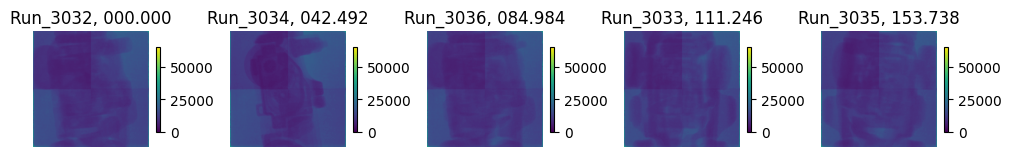

In [15]:
o_beam.visualization_cleaning()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: Export cleaned images

If you don't want to export the intermediate cleaned images, just skip the next cell!

In [ ]:
o_beam.select_export_folder()

In [ ]:
o_beam.export_cleaned_images()

<hr style="border-bottom: dotted 1px;" /><hr>

# Normalization

<font size=1><u>Developer Notes</u>: create the <i>normalized_data</i> 3D data array.

<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use proton charge</b></font>: that option will use the proton charge value requested for each runs and open beams and will bring them to the same value by applying a coefficient corector to the data.
- <font color=red><b>use acqusition number</b></font>: that option will use the acquisition number (if found) to match them between runs and apply a coefficient corector to the data.
- <font color=red><b>use background region of interest (ROI)</b></font>: select a region that does not contain any part of the sample in order to match the counts with the same ROI of the open beam.</font>

In [16]:
o_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [19]:
o_beam.normalization_select_roi()

This cell will perform the normalization using any of the settings you define just above.

In [20]:
o_beam.normalization()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run it only if you want to visualize the normalized data

In [21]:
o_beam.visualization_normalization_settings()

ToggleButtons(description='How to plot?', options=('1 image at a time', 'All images'), value='1 image at a tim…

interactive(children=(IntSlider(value=0, description='image_index', max=4), IntSlider(value=0, description='vm…

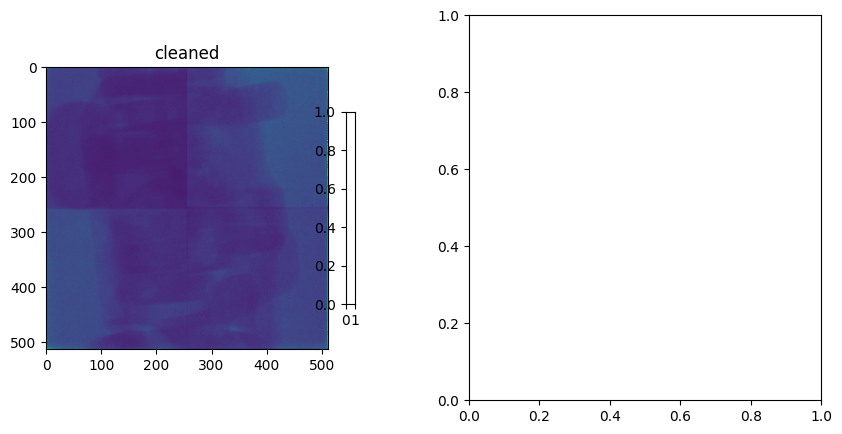

In [23]:
o_beam.visualize_normalization()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to export the normalized data

Select the folder where to export the normalized images

In [ ]:
o_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images

In [ ]:
o_beam.export_normalized_images()

<hr style="border-bottom: dotted 1px;" /><hr>

# Chips correction

<font size=1><u>Developer Notes</u>: create the <i>corrected_images<i> 3D data array</font>

In [17]:
o_beam.chips_correction()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: display images before and after chips correction

In [ ]:
o_beam.visualize_chips_correction()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to remove any stripes causing ring artifacs in the reconstruction

## Remove stripes

<font size=1><u>Developer Notes</u>: this step will create the 3d array <i>strip_corrected_images</i>

In [ ]:
o_beam.select_remove_strips_algorithms()

In [ ]:
o_beam.define_settings()

In [ ]:
o_beam.remove_strips_and_display()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to correct for tilt and center of rotation

# Calculate center of rotation and tilt

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> and the <b>tilt</b>
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='white'><u>Developer Notes</u>: this step will create the 3d array <i>corrected_images</i>

In [ ]:
o_beam.select_sample_roi()

In [ ]:
o_beam.calculate_center_of_rotation_and_tilt()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to review and <font color='blue'>exclude</font> any projections from the reconstruction.

In [ ]:
o_beam.final_projections_review()

<hr style="border-bottom: dotted 1px;" /><hr>

# Reconstruction

The following cells will perform the reconstruction using the svmbir algorithm

<font color='blue'><b>Instructions</b>: 

- select the vertical range of slices you want to use in the reconstruction (the larger the range, the longer it will take to reconstruct the volume). Any slice outside of that range won't be render.
- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>

The rendered slices will be automatically displayed when it's done!

In [ ]:
o_beam.svmbir_settings()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: run if you want to display the sinograms

In [ ]:
o_beam.svmbir_display_sinograms()

<hr style="border-bottom: dotted 1px;" /><hr>

Execute the reconstruction

In [ ]:
o_beam.svmbir_run()

# Export the slices

<font color='blue'><b>Instructions</b>: select the folder where to export the reconstructed slices

In [ ]:
o_beam.select_export_slices_folder()

This next cell will export the slices. 

In [ ]:
o_beam.export_slices()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='red' size='5'>OPTIONAL</font>: export log file

In [ ]:
o_beam.select_export_extra_files()

In [ ]:
o_beam.export_extra_files()